In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Importing the data

https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices?resource=download

In [83]:
diamonds = pd.read_csv("Diamonds Prices2022.csv")
diamonds = diamonds.drop(labels="Unnamed: 0", axis=1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Data looks as expected. The columns cut, color, and clarity are categorical data.

In [56]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

The data is not missing any values, which is nice

In [77]:
categorical_cols = ["cut", "color", "clarity"]
numerical_cols = ["carat", "depth", "table", "x", "y", "z"]

for col in categorical_cols:
    print(sorted(diamonds[col].unique()))

['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
['D', 'E', 'F', 'G', 'H', 'I', 'J']
['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']


These are the categorical levels for cut, color, and clarity

# Exploratory Analysis

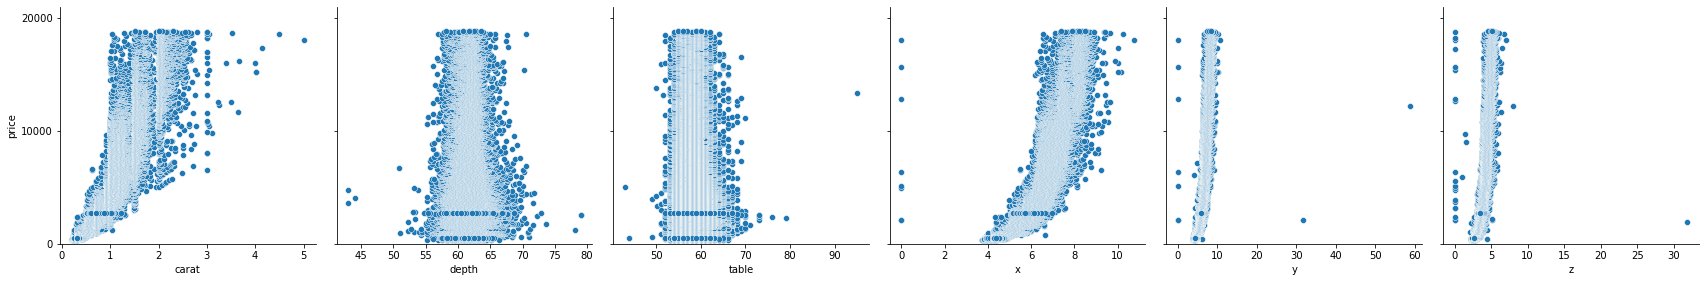

In [67]:
g = sns.PairGrid(diamonds, y_vars=["price"], 
                 x_vars=numerical_cols, 
                 height=4)
g.map(sns.scatterplot)
g.set(ylim=(-1, 21000), yticks=[0, 10000, 20000])

Among the numerical variables, it appears that the columns carat and x are the best at predicting price alone. However, this does not take into account possible interactions between the variables.

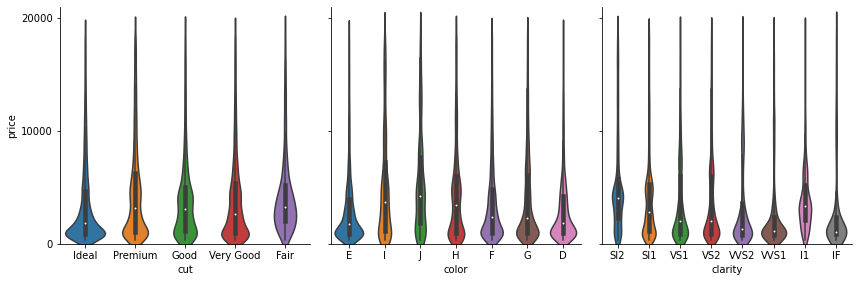

In [62]:
g = sns.PairGrid(diamonds, y_vars=["price"], 
                 x_vars=categorical_cols, 
                 height=4)
g.map(sns.violinplot)
g.set(ylim=(-1, 21000), yticks=[0, 10000, 20000])

Among the categorical variables, it looks like a diamonds cut and clarity have decent predicting power for price.

<AxesSubplot:xlabel='carat', ylabel='price'>

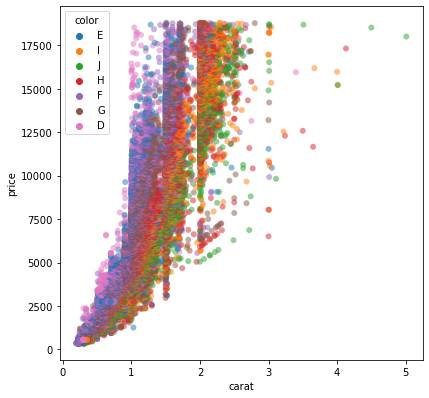

In [65]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="carat", y="price",
                hue="color", alpha=0.5,
                linewidth=0,
                data=diamonds, ax=ax)

There are a lot of data points here, but it appears that there is a color separation for a carat value when predicting price.

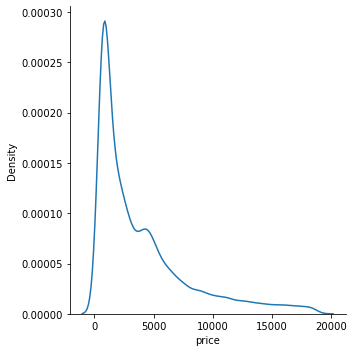

In [42]:
sns.displot(diamonds, x="price", kind="kde")

Price is a very right skewed data. However, it is unnecessary to scale the target variable.

# Data cleaning

In [84]:
from sklearn import preprocessing
from sklearn.compose import make_column_transformer

def prep_data(df, cat_cols, num_cols):
    df = df.copy()
    
    ss = preprocessing.StandardScaler()
    df[num_cols] = ss.fit_transform(df[num_cols])
    
    transformer = make_column_transformer(
        (preprocessing.OneHotEncoder(), cat_cols),
        remainder='passthrough')
    
    df = transformer.fit_transform(df)
    df = pd.DataFrame(df, 
        columns=transformer.get_feature_names_out())
    
    return df

diamonds = prep_data(diamonds, categorical_cols, numerical_cols)
diamonds.head()

,onehotencoder__cut_Fair,onehotencoder__cut_Good,onehotencoder__cut_Ideal,onehotencoder__cut_Premium,onehotencoder__cut_Very Good,onehotencoder__color_D,onehotencoder__color_E,onehotencoder__color_F,onehotencoder__color_G,onehotencoder__color_H,...,onehotencoder__clarity_VS2,onehotencoder__clarity_VVS1,onehotencoder__clarity_VVS2,remainder__carat,remainder__depth,remainder__table,remainder__price,remainder__x,remainder__y,remainder__z
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.198189,-0.174033,-1.099673,326.0,-1.587882,-1.536239,-1.571166
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.240384,-1.360676,1.585457,326.0,-1.641372,-1.658821,-1.741217
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.198189,-3.384949,3.375544,327.0,-1.498733,-1.457436,-1.741217
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-1.071605,0.454189,0.242892,334.0,-1.365010,-1.317342,-1.287749
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.029411,1.082412,0.242892,335.0,-1.240202,-1.212272,-1.117699


In [90]:
X = diamonds.drop("remainder__price", axis=1)
y = diamonds["remainder__price"]

Splitting the predictors from the target variable.

In [91]:
X.head()

,onehotencoder__cut_Fair,onehotencoder__cut_Good,onehotencoder__cut_Ideal,onehotencoder__cut_Premium,onehotencoder__cut_Very Good,onehotencoder__color_D,onehotencoder__color_E,onehotencoder__color_F,onehotencoder__color_G,onehotencoder__color_H,...,onehotencoder__clarity_VS1,onehotencoder__clarity_VS2,onehotencoder__clarity_VVS1,onehotencoder__clarity_VVS2,remainder__carat,remainder__depth,remainder__table,remainder__x,remainder__y,remainder__z
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.198189,-0.174033,-1.099673,-1.587882,-1.536239,-1.571166
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.240384,-1.360676,1.585457,-1.641372,-1.658821,-1.741217
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.198189,-3.384949,3.375544,-1.498733,-1.457436,-1.741217
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.071605,0.454189,0.242892,-1.365010,-1.317342,-1.287749
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.029411,1.082412,0.242892,-1.240202,-1.212272,-1.117699


In [92]:
y.head()

0    326.0
1    326.0
2    327.0
3    334.0
4    335.0
Name: remainder__price, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40457, 26), (13486, 26), (40457,), (13486,))

25% of the data is being kept as part of the test set to validate the model.

# Model Construction

In [94]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(max_iter=1000, tol=1e-3)
reg.fit(X_train, y_train)
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.9190551982143873, 0.9212324541801292)

The model seems to be performing very well with a score over 90% and no apparent overfitting since there is little difference between the training and testing data sets.